## Data Cleaning on Unicorn dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('unicorn.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Renaming the columns 

In [3]:
df=df.rename(columns={'Country/Region':'Country', 'Select Investors': 'Investors'})

using the basic `head()`, `shape()` and `decribe()` to understand the data. The describe function gives us the descriptive statistcis for the dataframe 

In [4]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
df.shape

(1074, 10)

In [6]:
df.size

10740

In [7]:
df.describe(include='all')

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Investors
count,1074,1074.000000,1074,1074,1057,1074,1074,1074.000000,1074,1074
unique,1071,NaN,638,18,256,47,6,NaN,538,1059
top,BrewDog,NaN,2021-07-13,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,NaN,9,204,149,561,588,NaN,59,3
mean,NaN,3.445996,NaN,NaN,NaN,NaN,NaN,2012.870577,NaN,NaN
std,NaN,8.544242,NaN,NaN,NaN,NaN,NaN,5.705494,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


### Checking for missing values and finding the total percent of missing values in each column

In [8]:
 df.isna().sum()

Company          0
Valuation        0
Date Joined      0
Industry         0
City            17
Country          0
Continent        0
Year Founded     0
Funding          0
Investors        0
dtype: int64

In [10]:
#Checking the percentage of missing values in each column 
df.isna().mean()*100

Company         0.000000
Valuation       0.000000
Date Joined     0.000000
Industry        0.000000
City            1.582868
Country         0.000000
Continent       0.000000
Year Founded    0.000000
Funding         0.000000
Investors       0.000000
dtype: float64

In [15]:
##Checking the percent of missing values in total columns 
total_missing=df.isna().sum().sum()
total_cells= np.product(df.shape)
percent_missing= (total_missing/total_cells)*100
percent_missing

0.15828677839851024

### Checking for duplicates in the dataset

In [59]:
df.duplicated().sum()

0

**Subset of Duplicates**

In order to find Duplicates in columns we used the subset

In [61]:
df[df.duplicated(subset='Company', keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Investors
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube"
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs"
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob..."
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings


we can drop duplicates in the similar way by using `drop_duplicates(subset='Company')`.

In [11]:
df.duplicated().sum()

0

In [12]:
df.sort_values(by='Valuation', ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,38,2019-02-05,Data management and analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


### Sorting the values 

In [13]:
df.sort_values(by='Date Joined'). head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
716,Veepee,1,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding"
117,Vice Media,6,2011-04-02,Internet software & services,Brooklyn,United States,North America,1994,$1B,"Technology Crossover Ventures, A&E Television ..."
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
594,Trendy Group International,2,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,$200M,L Capital Partners
13,Fanatics,27,2012-06-06,E-commerce & direct-to-consumer,Jacksonville,United States,North America,2002,$4B,"SoftBank Group, Andreessen Horowitz, Temasek H..."


### Filtering the values 

In [14]:
fintech=df[df['Industry']=='Fintech']
fintech.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
10,Revolut,33,2018-04-26,Fintech,London,United Kingdom,Europe,2015,$2B,"index Ventures, DST Global, Ribbit Capital"
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
20,Rapyd,15,2019-12-03,Fintech,London,United Kingdom,Europe,2016,$770M,"Target Global, General Catalyst, Durable Capit..."


In [15]:
fintech.describe(include='all')

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
count,204,204.000000,204,204,199,204,204,204.000000,204,204
unique,204,NaN,164,1,77,30,6,NaN,163,203
top,Klarna,NaN,2021-05-18,Fintech,San Francisco,United States,North America,NaN,$1B,"Tiger Global Management, Sequoia Capital India..."
freq,1,NaN,3,204,34,107,116,NaN,7,2
mean,NaN,3.401961,NaN,NaN,NaN,NaN,NaN,2014.034314,NaN,NaN
std,NaN,5.544730,NaN,NaN,NaN,NaN,NaN,4.751334,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1990.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN


### Data Slicing using Iloc and loc functions

In order to slice the data on a dataframe, we used iloc and loc functions.

In [16]:
df.iloc[1:4]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"


In [17]:
#Slicing specific rows
df.iloc[[1,3,6]]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."


In [18]:
df.iloc[0:6]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."


Using `loc` and `iloc` to slice the data. In `iloc` for both rows and columns we use integers whereas in `loc` we use integers for rows and column name in [] to extract the column

In [19]:
df.iloc[0:5,2]

0    2017-04-07
1    2012-12-01
2    2018-07-03
3    2014-01-23
4    2011-12-12
Name: Date Joined, dtype: object

In [20]:
df.loc[0:5,['Company','Industry']]

,Company,Industry
0,Bytedance,Artificial intelligence
1,SpaceX,Other
2,SHEIN,E-commerce & direct-to-consumer
3,Stripe,FinTech
4,Klarna,Fintech
5,Canva,Internet software & services


replacing values using loc method

In [21]:
df.loc[df['Company']=='SpaceX', 'Industry']='Artificial intelligence'

In [22]:
df.loc[0:5,['Company','Industry']]

,Company,Industry
0,Bytedance,Artificial intelligence
1,SpaceX,Artificial intelligence
2,SHEIN,E-commerce & direct-to-consumer
3,Stripe,FinTech
4,Klarna,Fintech
5,Canva,Internet software & services


### Finding the misspellings and relacing in the columns

In [23]:
df['Industry'].unique()

array(['Artificial intelligence', 'E-commerce & direct-to-consumer',
       'FinTech', 'Fintech', 'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management and analytics', 'Other', 'Edtech', 'Health',
       'Hardware', 'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Data management & analytics',
       'Artificial Intelligence'], dtype=object)

In [24]:
Industry={'Artifical Intelligence':'Artificial intelligence','FinTech':'Fintech','Data management & analytics':'Data management and analytics'}

In [25]:
df['Industry']= df['Industry'].replace(Industry)

In [26]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Artificial intelligence,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [27]:
df['Industry'].unique()

array(['Artificial intelligence', 'E-commerce & direct-to-consumer',
       'Fintech', 'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management and analytics', 'Other', 'Edtech', 'Health',
       'Hardware', 'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

### Using groupby for aggregate functions

In [35]:
valuation=df.groupby('Industry')['Valuation'].sum().sort_values(ascending=False).reset_index(name="Total_Valuation")
valuation

,Industry,Total_Valuation
0,Fintech,871
1,Internet software & services,593
2,Artificial intelligence,461
3,E-commerce & direct-to-consumer,426
4,Health,200
5,"Supply chain, logistics, & delivery",177
6,Other,153
7,Data management and analytics,136
8,Cybersecurity,129
9,Consumer & retail,108


### Creating a barplot for the dataset

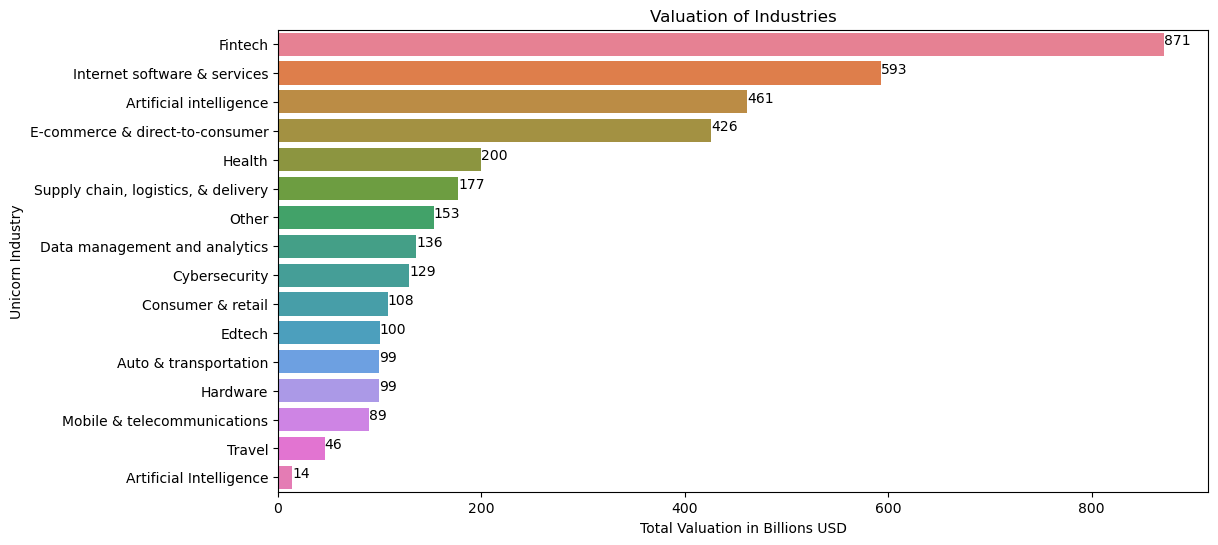

In [51]:
#Define a custom palattete
custom_palette = sns.color_palette('husl', 16)

plt.figure(figsize=(12,6))
sns.barplot(x='Total_Valuation', y='Industry', data=valuation, orient='h', palette=custom_palette )
plt.title('Valuation of Industries')
plt.ylabel('Unicorn Industry')
plt.xlabel('Total Valuation in Billions USD')
#Adding labels
for index, value in enumerate(valuation['Total_Valuation']):
    plt.text(value, index, str(value))
